# i. Perkenalan

<b>

==============================

Nama: Muhammad Iqbal Saputra

Batch: RMT-032

Objektif dari program ini adalah untuk membangun model linear regression untuk memprediksi 'biaya pendidikan' yang harus dibayar oleh seseorang yang berkuliah di UK


==============================


# ii. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pickle
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from scipy.stats import kendalltau, pearsonr, spearmanr
from feature_engine.outliers import Winsorizer

In [2]:
!pip install feature_engine

Defaulting to user installation because normal site-packages is not writeable


# iii. Data Loading

In [3]:
# membaca csv
df = pd.read_csv('university-tuition-fees.csv')

# menampilkan 3 data teratas (utk memastikan apakah loading file berhasil)
df.head(3)

,region,founded_year,uk_rank,world_rank,minimum_ielts_score,tuition_fees,international_students,student_satisfaction,student_enrollment,academic_staff,type,location,cost_of_living
0,Wales,1920,31,422,4.5,13800,15.4,81.5,"20,000-24,999","1,000-1,499",Public,Suburban,7500
1,London,1907,4,8,6.5,23500,41.4,77.9,"15,000-19,999","4,000-4,499",Public,Urban,10700
2,Wales,2011,112,1821,4.5,10800,18.0,80.0,"10,000-14,999",700-799,Public,Urban,7500


In [4]:
# menampilkan 3 data terbawah (utk memastikan apakah loading file berhasil)
df.tail(3)

,region,founded_year,uk_rank,world_rank,minimum_ielts_score,tuition_fees,international_students,student_satisfaction,student_enrollment,academic_staff,type,location,cost_of_living
128,South East England,1966,32,342,5.5,13300,24.4,78.2,"15,000-19,999","1,000-1,499",Public,Suburban,10700
129,East Midlands,1957,41,167,4.5,14000,22.2,78.0,"15,000-19,999","1,500-1,999",Public,Suburban,7650
130,London,1890,84,747,4.0,10850,14.9,78.4,"15,000-19,999","1,000-1,499",Public,Suburban,10229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  131 non-null    object 
 1   founded_year            131 non-null    int64  
 2   uk_rank                 131 non-null    int64  
 3   world_rank              131 non-null    int64  
 4   minimum_ielts_score     131 non-null    float64
 5   tuition_fees            131 non-null    int64  
 6   international_students  131 non-null    float64
 7   student_satisfaction    131 non-null    float64
 8   student_enrollment      131 non-null    object 
 9   academic_staff          131 non-null    object 
 10  type                    131 non-null    object 
 11  location                113 non-null    object 
 12  cost_of_living          131 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 13.4+ KB


In [6]:
df.isnull().sum()

region                     0
founded_year               0
uk_rank                    0
world_rank                 0
minimum_ielts_score        0
tuition_fees               0
international_students     0
student_satisfaction       0
student_enrollment         0
academic_staff             0
type                       0
location                  18
cost_of_living             0
dtype: int64

terdapat lumayan missing value pada kolom 'location'

In [7]:
# cek size dataset sebelum membersihkan missing value
df.shape

(131, 13)

In [8]:
# menghapus baris yang berisi missing value pada Kolom 'location'
df = df.dropna(subset=['location'])

In [9]:
# cek size dataset setelah membersihkan missing value
df.shape

(113, 13)

In [10]:
df.head(10)

,region,founded_year,uk_rank,world_rank,minimum_ielts_score,tuition_fees,international_students,student_satisfaction,student_enrollment,academic_staff,type,location,cost_of_living
0,Wales,1920,31,422,4.5,13800,15.40,81.5,"20,000-24,999","1,000-1,499",Public,Suburban,7500
1,London,1907,4,8,6.5,23500,41.40,77.9,"15,000-19,999","4,000-4,499",Public,Urban,10700
2,Wales,2011,112,1821,4.5,10800,18.00,80.0,"10,000-14,999",700-799,Public,Urban,7500
3,South West England,2001,95,2073,4.5,11500,3.70,78.0,"8,000-8,999",600-699,Public,Suburban,8217
4,East of England,1858,120,730,4.0,10500,10.40,79.0,"20,000-24,999",900-999,Public,Urban,9415
5,South West England,1966,11,261,5.5,14300,21.70,81.8,"15,000-19,999","1,000-1,499",Public,Suburban,11000
6,Scotland,1413,3,86,6.5,17040,40.40,87.9,"10,000-14,999","1,000-1,499",Public,Suburban,12000
7,Wales,2012,17,2840,4.5,8500,5.10,82.4,"5,000-5,999",100-199,Public,Rural,6000
8,West Midlands,1968,115,5253,4.5,10500,15.59,81.2,"2,000-2,999",100-199,Public,Suburban,10000
9,London,1966,73,301,4.5,13000,35.30,77.1,"20,000-24,999","2,000-2,499",Public,Urban,12000


In [11]:
# deep copy data
dataset = copy.deepcopy(df)

# iv. Exploratory Data Analysis (EDA)

In [12]:
# gambaran statistik kolom numerik
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
founded_year,113.0,1920.477876,147.532327,1096.0,1897.0,1966.0,1992.0,2013.0
uk_rank,113.0,63.433628,38.285086,1.0,29.0,62.0,96.0,131.0
world_rank,113.0,994.460177,1052.912339,2.0,182.0,674.0,1334.0,5253.0
minimum_ielts_score,113.0,4.973451,0.626216,4.0,4.5,4.5,5.5,6.5
tuition_fees,113.0,12652.929204,2644.795292,8350.0,10800.0,12000.0,13860.0,23500.0
international_students,113.0,15.788053,9.751783,0.7,8.7,14.9,20.8,50.5
student_satisfaction,113.0,78.366372,3.418009,66.1,77.0,78.5,80.1,87.9
cost_of_living,113.0,8632.672566,1568.222039,5500.0,7500.0,8217.0,9500.0,15000.0


gambaran umum tentang distribusi data dan variasi dalam dataset

In [13]:
# membuat fungsi untuk mengkategorikan universitas based on world_rank
def categorize_league(world_rank):
    if world_rank < 99:
        return 'League A'
    elif 100 <= world_rank < 499:
        return 'League B'
    elif 500 <= world_rank < 999:
        return 'League C'
    elif 1000 <= world_rank < 1999:
        return 'League D'
    elif 2000 <= world_rank < 3999:
        return 'League E'
    else:
        return 'League F'

# membuat kolom league
dataset['league'] = dataset['world_rank'].apply(categorize_league)

# menghitung jumlah kampus di setiap league
league_counts = dataset['league'].value_counts().sort_values(ascending=False)

display(league_counts)


league
League B    28
League C    28
League D    22
League A    16
League E    15
League F     4
Name: count, dtype: int64

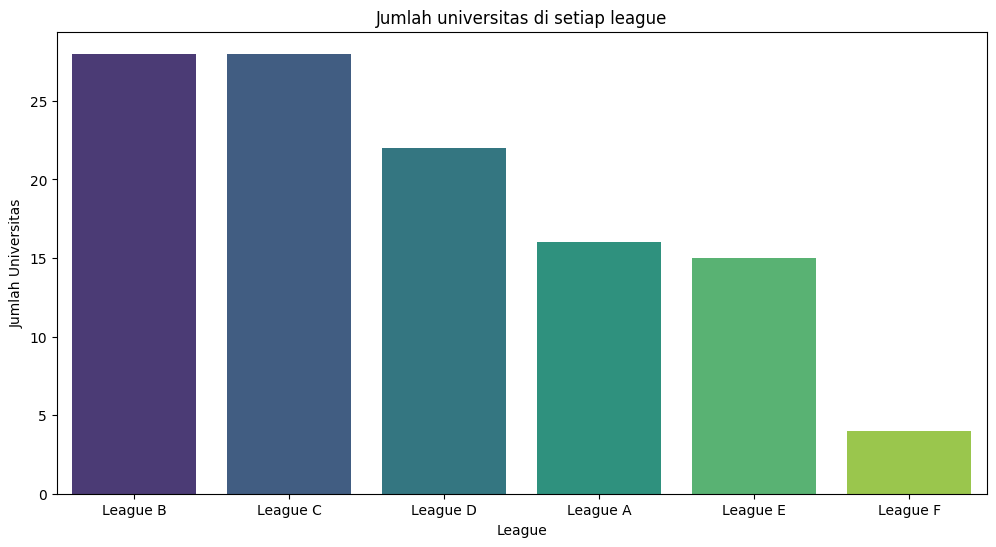

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x=league_counts.index, y = league_counts.values, palette='viridis')
plt.title("Jumlah universitas di setiap league")
plt.xlabel("League")
plt.ylabel("Jumlah Universitas")
plt.show()

**Kesimpulan**:

- Distribusi Universitas: `League C` dan `League B` memiliki universitas terbanyak dan `League F` memiliki universitas paling dikit

In [15]:
# analisis tuition_fees berdasarkan league
league_group = dataset.groupby('league')['tuition_fees'].describe()

display(league_group)

,count,mean,std,min,25%,50%,75%,max
league,,,,,,,,
League A,16.0,16673.750000,2968.822157,13650.0,14800.00,15630.0,17040.0,23500.0
League B,28.0,13731.785714,1776.142415,10500.0,12987.50,13650.0,14212.5,18630.0
League C,28.0,11986.928571,1376.835016,9500.0,11187.50,11647.5,12552.5,16880.0
League D,22.0,10752.136364,822.796873,8350.0,10475.25,10775.0,11112.5,12100.0
League E,15.0,10888.666667,1928.296312,8500.0,10125.00,10750.0,11185.0,17160.0
League F,4.0,10750.000000,1190.238071,10000.0,10000.00,10250.0,11000.0,12500.0


**Kesimpulan:**

- `League A`:
    - rata-rata biaya kuliah = `16,673`
    - range biaya kuliah = `13,650 - 23,500`

- `League B`:
    - rata-rata biaya kuliah = `13,731`
    - range biaya kuliah = `10,500 - 18,630`

- `League C`:
    - rata-rata biaya kuliah = `11,986`
    - range biaya kuliah = `9,500 - 16,880`

- `League D`:
    - rata-rata biaya kuliah = `10,752`
    - range biaya kuliah = `8,350 - 12,100`

- `League E`:
    - rata-rata biaya kuliah = `10,888`
    - range biaya kuliah = `8,500 - 17,160`

- `League F`:
    - rata-rata biaya kuliah = `10,750`
    - range biaya kuliah = `10,000 - 12,500`



# v. Feature Engineering

## Handling Cardinality

In [16]:
# mengdefinisikan kolom kategorikal dan numerik
cat_columns = dataset.select_dtypes(include=['object']).columns.tolist()
num_columns = dataset.select_dtypes(include=np.number).columns.tolist()

print('numerical', num_columns)
print('Categorical', cat_columns)

numerical ['founded_year', 'uk_rank', 'world_rank', 'minimum_ielts_score', 'tuition_fees', 'international_students', 'student_satisfaction', 'cost_of_living']
Categorical ['region', 'student_enrollment', 'academic_staff', 'type', 'location', 'league']


In [17]:
# membuat list untuk menampung kolom kategorikal
cat_columns_unique = []

for i in cat_columns:
    cat_columns_unique.append([i, dataset[i].nunique()])

# menampilkan kolom kategorikal beserta unique valuenya
pd.DataFrame(data=cat_columns_unique, columns=['categorical_column', 'unique_value'])

,categorical_column,unique_value
0,region,12
1,student_enrollment,16
2,academic_staff,18
3,type,2
4,location,3
5,league,6


kolom kategorikal sudah siap di encoding

## Splitting between Train-set and Test-set

In [18]:
# Memisahkan dataset menjadi fitur (X) dan target (y)
X = dataset.drop(columns='tuition_fees')
y = dataset['tuition_fees']

# Memisahkan dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # pareto principle

# Menampilkan ukuran dari train set dan test set
print(f'Train set: {X_train.shape}')
print(f'Test set: {X_test.shape}')


Train set: (90, 13)
Test set: (23, 13)


## Handling Outliers

In [19]:
# List kolom numerik dari dataset
num_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Membuat data dan kolom untuk distribusi normal
data_normal = []
column_normal = []

# Membuat data dan kolom untuk distribusi skewed
data_skewed = []
column_skewed = []

# Melakukan loop pada setiap kolom numerik untuk memfilter data distribusi normal atau skewed
for num in num_columns:
    skewness = X_train[num].skew()
    
    # Jika data terdistribusi normal
    if skewness <= 0.5 and skewness >= -0.5:            
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    # Jika data memiliki skewness rendah
    elif skewness < -0.5 and skewness > -1: 
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Jika data memiliki skewness tinggi
    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])


In [20]:
# Menampilkan kolom yang terdistribusi normal
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])


,normal_distribution,skewness
0,uk_rank,-0.010691
1,student_satisfaction,0.286726
2,cost_of_living,0.268150


In [21]:
# Menampilkan kolom yang terdistribusi skewed
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])


,skewed_distribution,skewness,rate
0,founded_year,-3.531496,high
1,world_rank,1.770488,high
2,minimum_ielts_score,0.535066,low
3,international_students,1.054844,high


In [22]:
# Daftar kolom dengan variasi rendah
low_variation_column = ['surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex']

# Menghapus kolom dengan variasi rendah dari kolom skewed dan menambahkannya ke kolom normal
for col in low_variation_column:
    if col in column_skewed:
        column_skewed.remove(col)
        column_normal.append(col)


In [23]:
# Metode Capping untuk Distribusi Normal
winsorizer_normal = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=column_normal, missing_values='ignore')

# Fit & Transform pada X_train
X_train_capped = winsorizer_normal.fit_transform(X_train)

# Transform pada X_test
X_test_capped = winsorizer_normal.transform(X_test)


In [24]:
# Metode Capping untuk Distribusi Skewed
winsorizer_skewed = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=column_skewed)

# Fit & Transform pada X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transform pada X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)


In [25]:
# Fungsi untuk Plot Perbandingan Distribusi Sebelum dan Sesudah Penanganan Outlier
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Ukuran Figure dan Super Title berdasarkan variabel
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Sebelum
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Sebelum
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram Sesudah
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot Sesudah
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


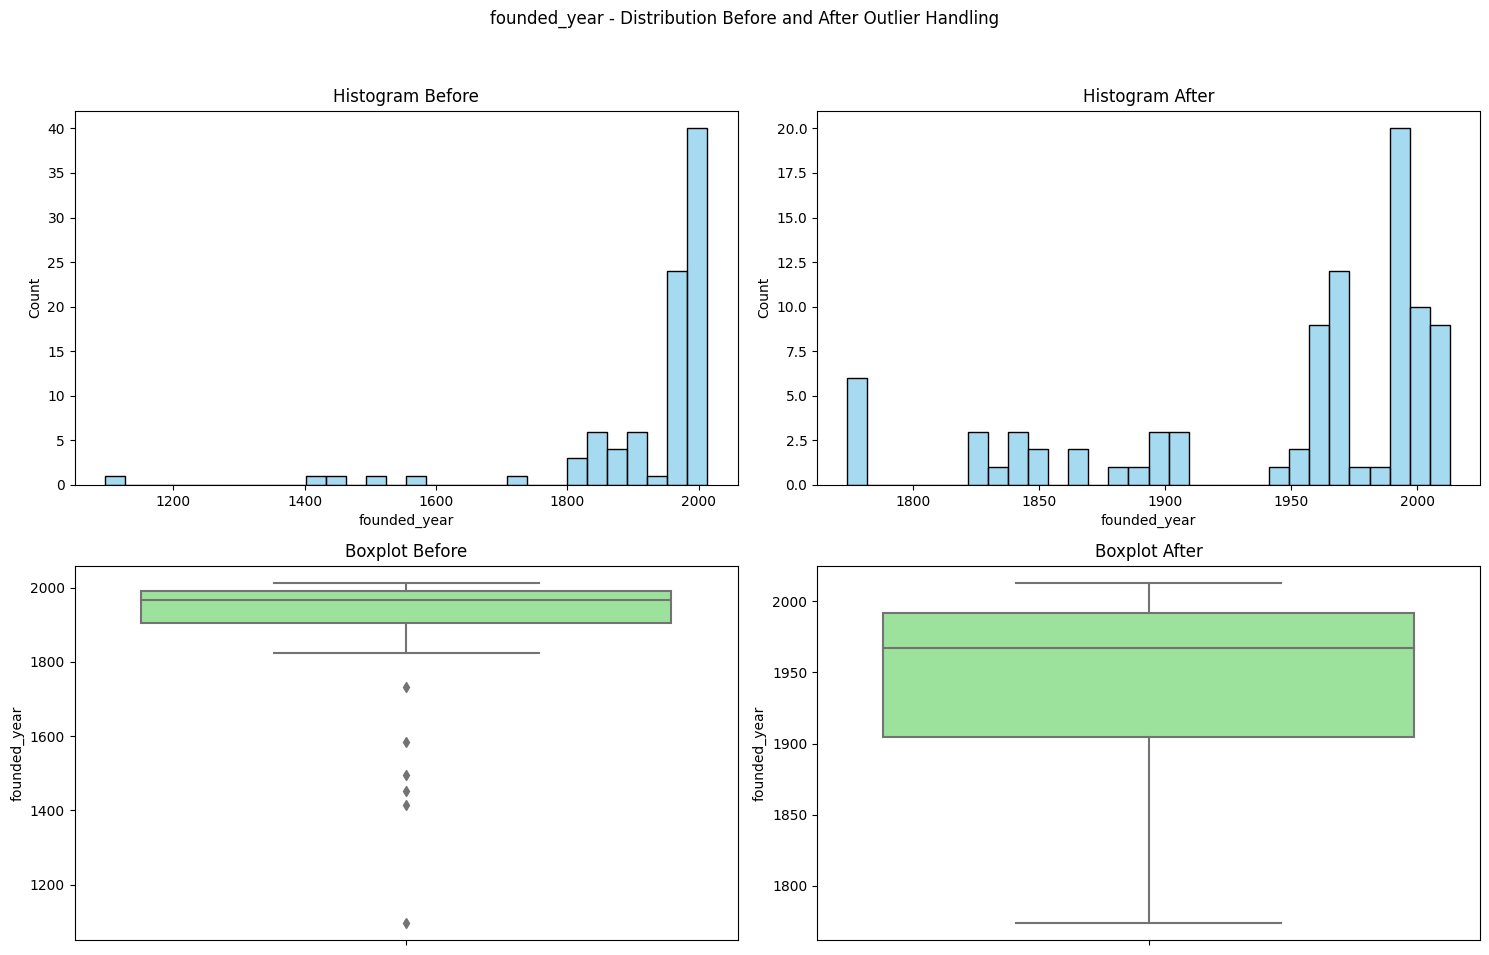

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


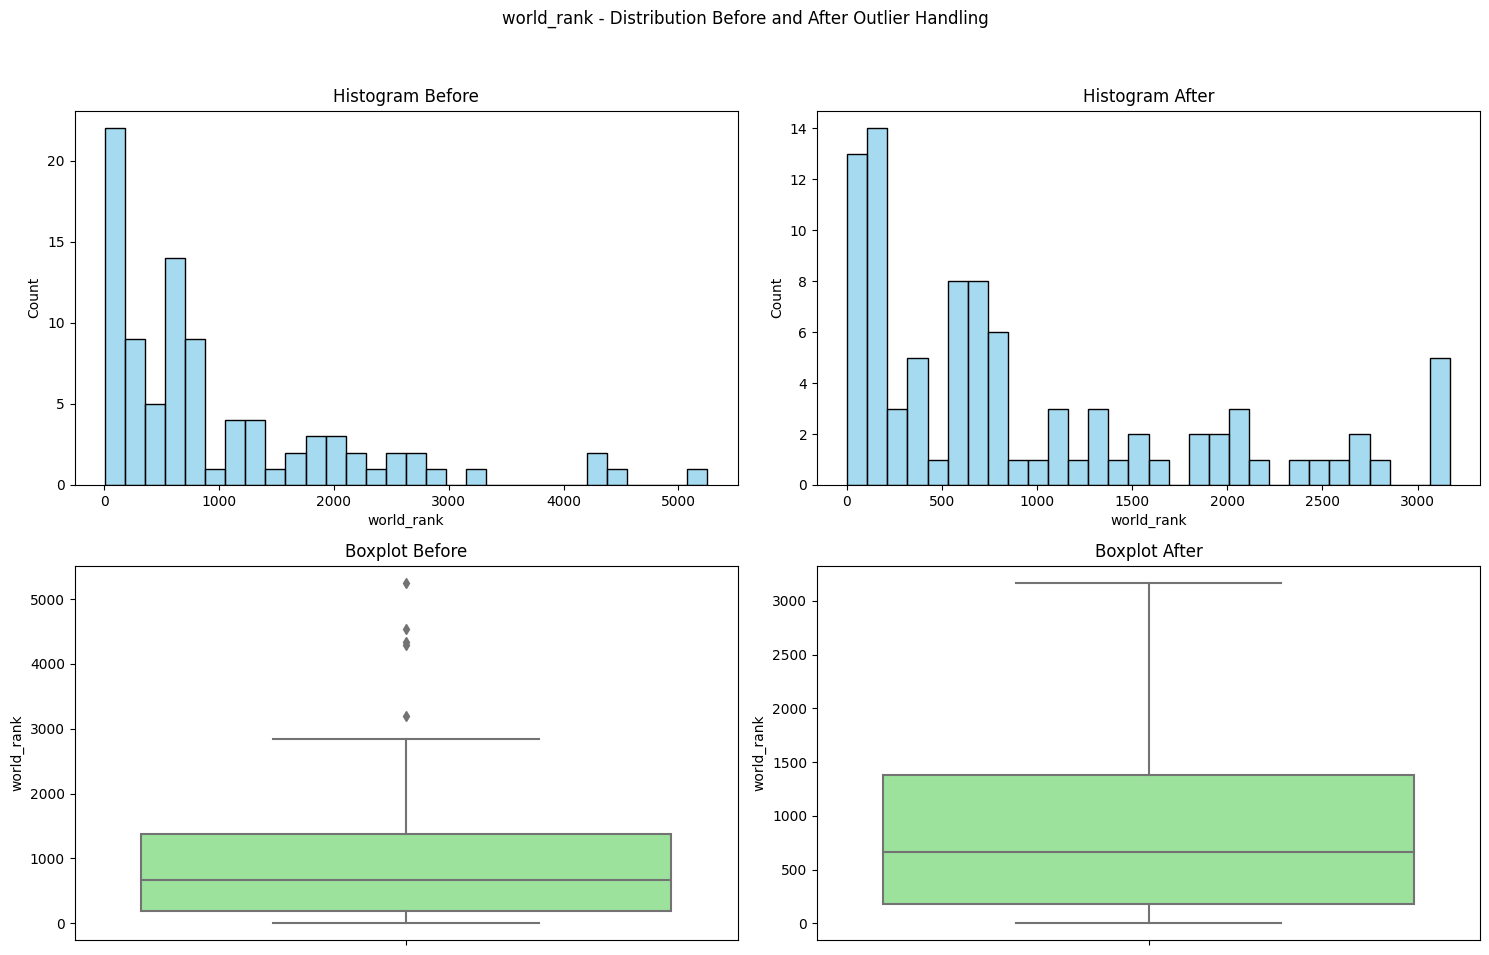

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


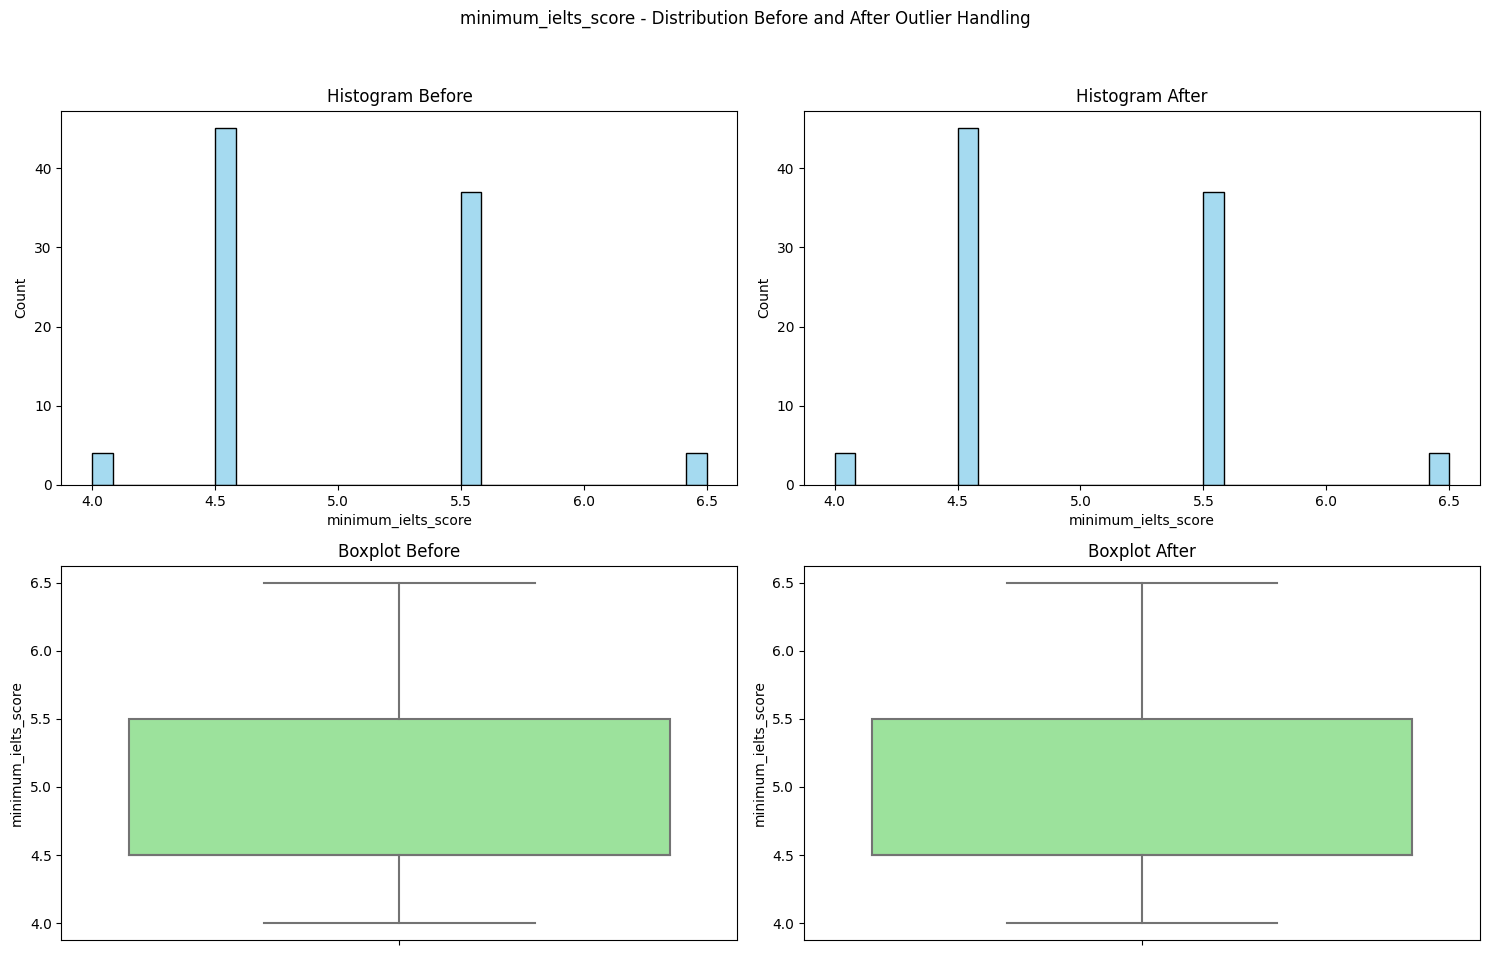

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


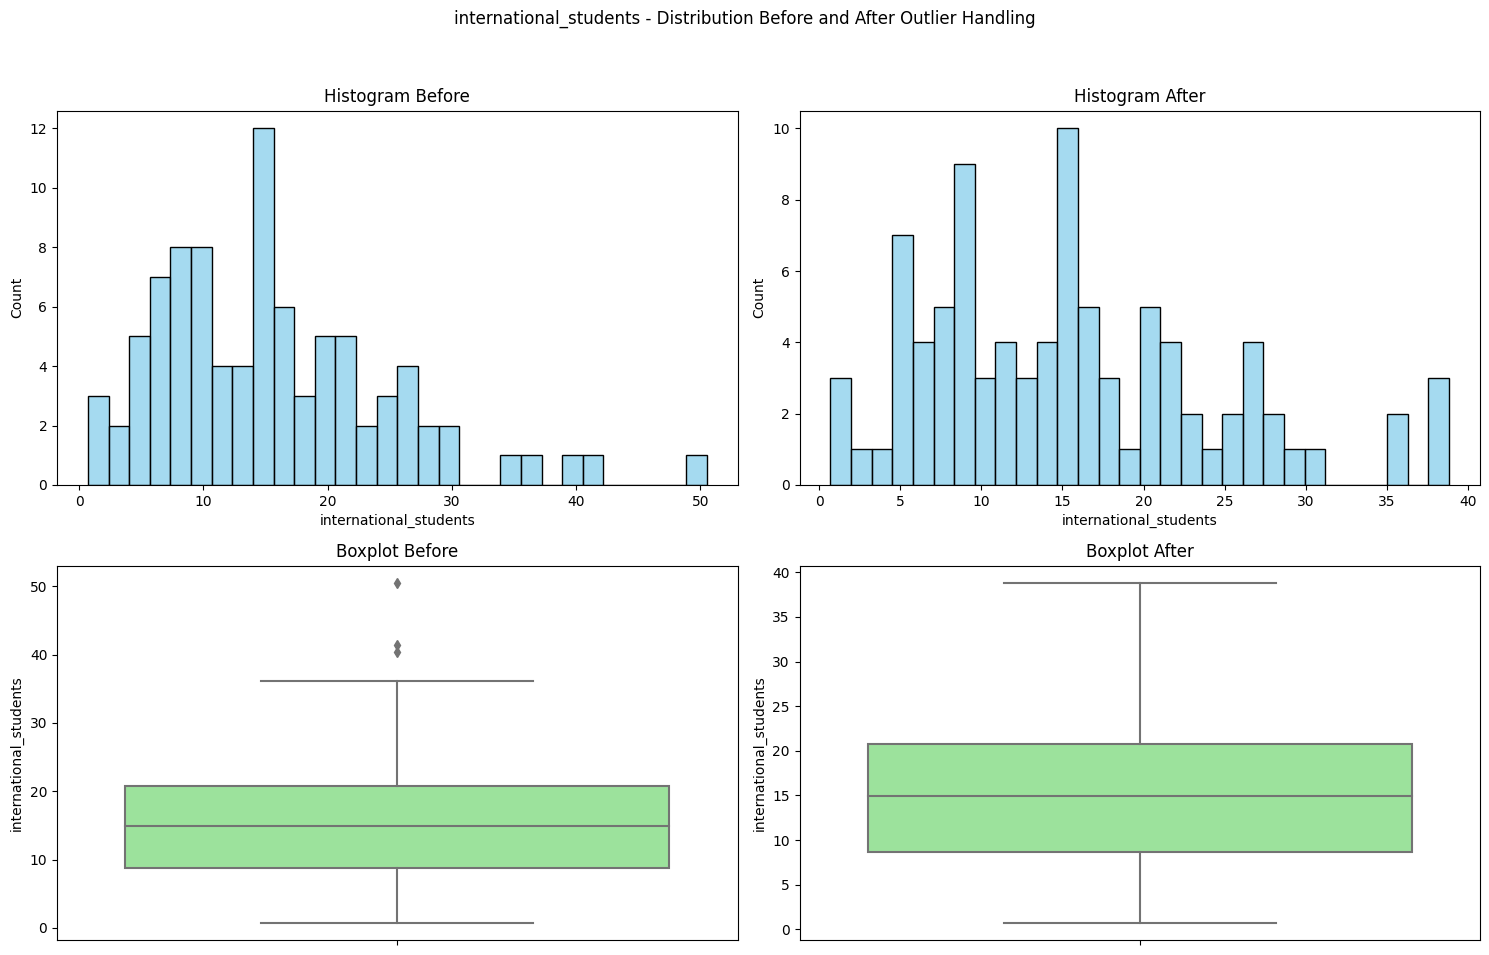

In [26]:
# Menampilkan visualisasi perbandingan distribusi sebelum dan sesudah penanganan outlier untuk kolom skewed
for col in column_skewed:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


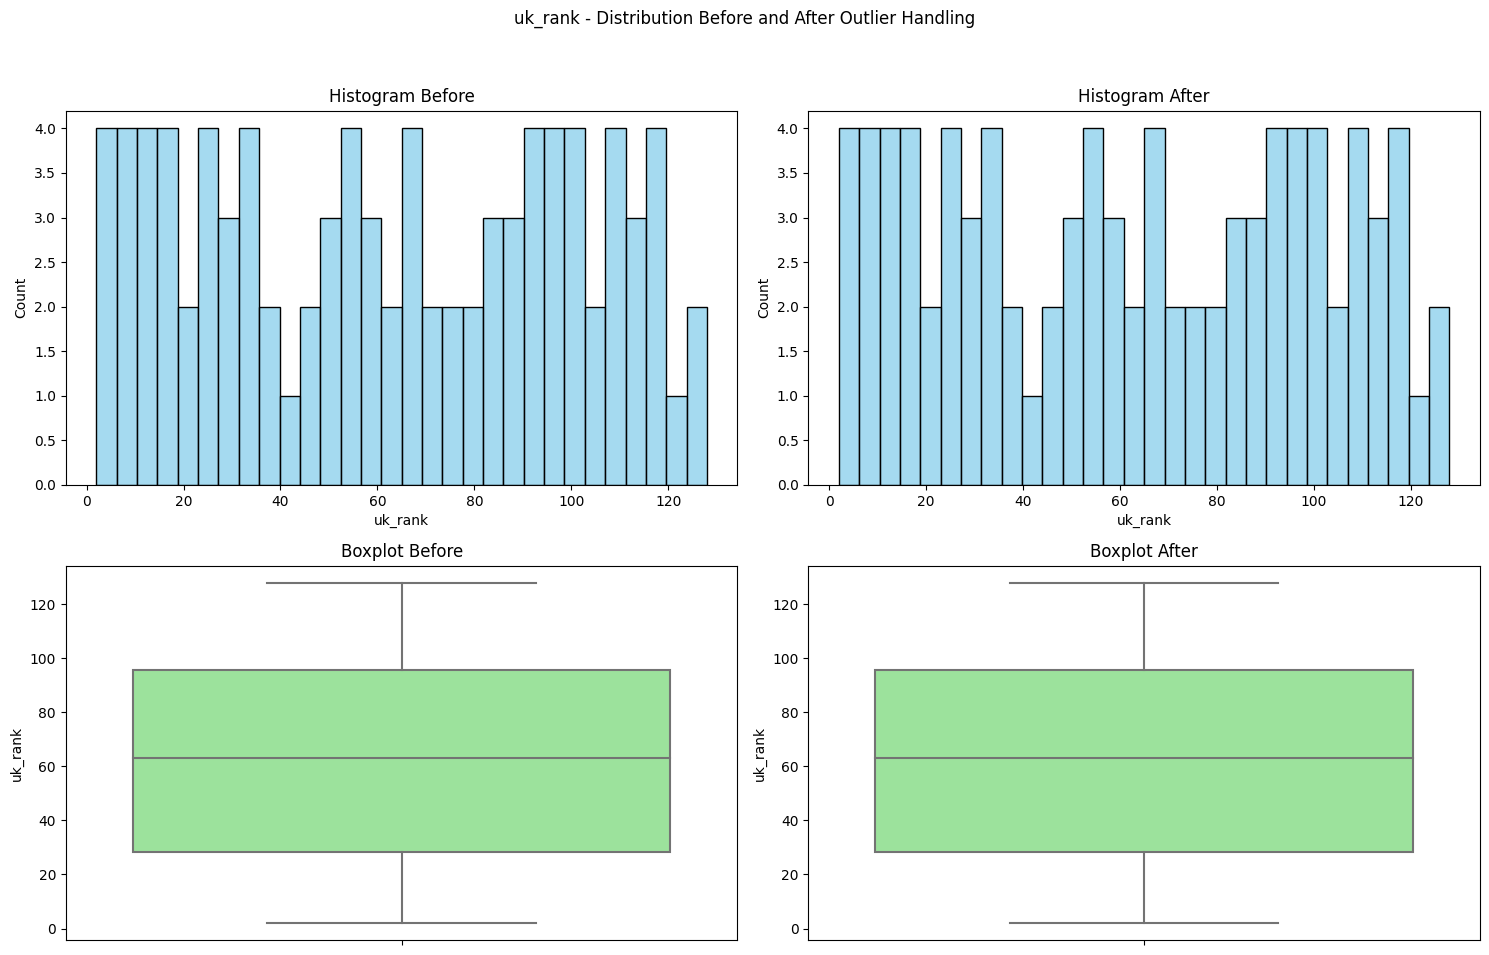

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


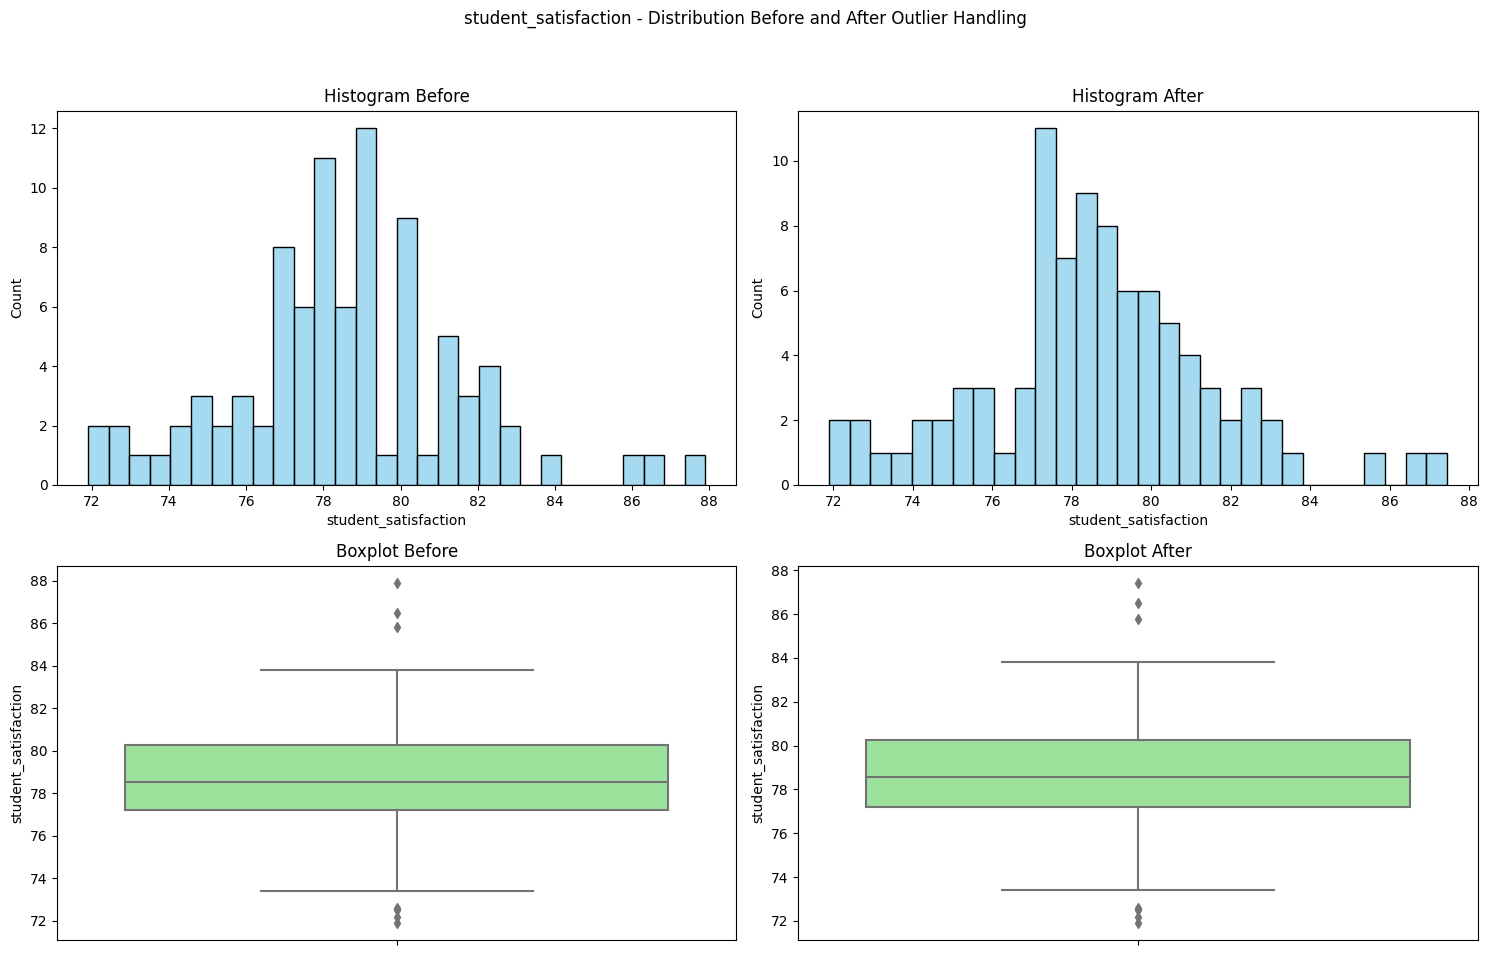

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


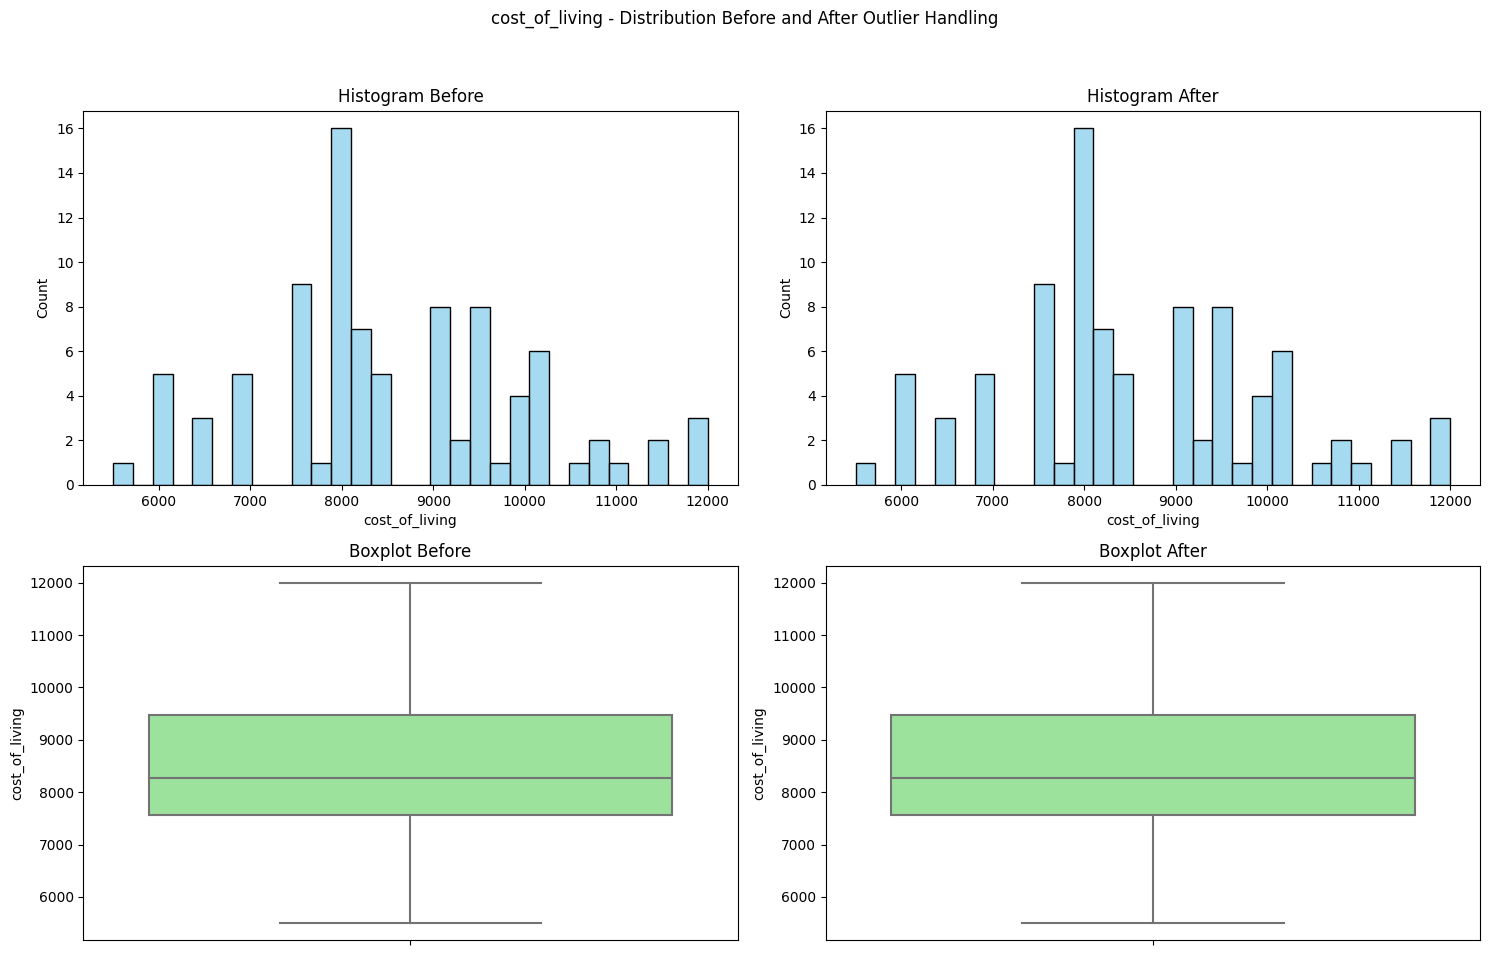

In [27]:
# Menampilkan visualisasi perbandingan distribusi sebelum dan sesudah penanganan outlier untuk kolom normal
for col in column_normal:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)


## Handling Missing Values

In [28]:
X_train_capped.isnull().sum()

region                    0
founded_year              0
uk_rank                   0
world_rank                0
minimum_ielts_score       0
international_students    0
student_satisfaction      0
student_enrollment        0
academic_staff            0
type                      0
location                  0
cost_of_living            0
league                    0
dtype: int64

In [29]:
X_test_capped.isnull().sum()

region                    0
founded_year              0
uk_rank                   0
world_rank                0
minimum_ielts_score       0
international_students    0
student_satisfaction      0
student_enrollment        0
academic_staff            0
type                      0
location                  0
cost_of_living            0
league                    0
dtype: int64

In [30]:
y_train.isnull().sum()

0

In [31]:
y_test.isnull().sum()

0

Data tidak memiliki missing value, sehingga proses feature engineering bisa dilanjutkan ke tahapan encoding dan scaling

## Split between Numeric Columns and Categorical Columns

In [32]:
# Mengidentifikasi kolom numerik dan kolom kategorikal pada dataset yang telah di-feature engineering
numeric_columns = X_train_capped.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X_train_capped.select_dtypes(include=['object']).columns

# Memisahkan kolom numerik
X_train_numeric = X_train_capped[numeric_columns]
X_test_numeric = X_test_capped[numeric_columns]

# Memisahkan kolom kategorikal
X_train_categorical = X_train_capped[categorical_columns]
X_test_categorical = X_test_capped[categorical_columns]

# Menampilkan hasil pemisahan menggunakan DataFrame
numeric_columns_df = pd.DataFrame(numeric_columns, columns=['Numeric Columns'])
categorical_columns_df = pd.DataFrame(categorical_columns, columns=['Categorical Columns'])

display(numeric_columns_df)
display(categorical_columns_df)


,Numeric Columns
0,founded_year
1,uk_rank
2,world_rank
3,minimum_ielts_score
4,international_students
5,student_satisfaction
6,cost_of_living


,Categorical Columns
0,region
1,student_enrollment
2,academic_staff
3,type
4,location
5,league


In [33]:
X_train_numeric

,founded_year,uk_rank,world_rank,minimum_ielts_score,international_students,student_satisfaction,cost_of_living
35,1862.000,102,3169.625,5.5,15.590,75.8,7500
76,1966.000,33,314.000,5.5,20.300,77.9,8000
128,1966.000,32,342.000,5.5,24.400,78.2,10700
125,1973.000,92,2004.000,4.5,38.825,80.5,8000
24,1773.875,25,24.000,5.5,28.000,72.6,8500
...,...,...,...,...,...,...,...
124,1992.000,40,607.000,4.5,6.600,81.7,9398
15,2005.000,118,1578.000,4.5,5.700,75.7,8990
104,1992.000,58,469.000,4.5,11.600,83.1,8217
59,2005.000,98,2190.000,4.5,6.100,78.5,10000


In [34]:
X_train_categorical

,region,student_enrollment,academic_staff,type,location,league
35,East of England,"2,000-2,999",100-199,Public,Urban,League F
76,Scotland,"10,000-14,999",800-899,Public,Suburban,League B
128,South East England,"15,000-19,999","1,000-1,499",Public,Suburban,League B
125,South East England,"3,000-3,999",100-199,Private,Rural,League E
24,Scotland,"30,000-34,999","over-5,000",Public,Urban,League A
...,...,...,...,...,...,...
124,East Midlands,"30,000-34,999","2,000-2,499",Public,Urban,League C
15,South East England,"10,000-14,999",700-799,Public,Urban,League D
104,South West England,"25,000-29,999","1,500-1,999",Public,Suburban,League B
59,South East England,"7,000-7,999",700-799,Public,Suburban,League E


In [35]:
X_test_numeric

,founded_year,uk_rank,world_rank,minimum_ielts_score,international_students,student_satisfaction,cost_of_living
92,1962.000,131,2759,5.5,15.590,69.777111,10229.00000
4,1858.000,120,730,4.0,10.400,79.000000,9415.00000
47,1848.000,126,1025,4.5,12.400,75.700000,12917.83547
79,1773.875,1,4,6.5,20.200,85.500000,12000.00000
11,1850.000,85,2386,4.5,4.200,79.000000,8000.00000
53,1992.000,53,1184,4.5,3.000,79.800000,8097.00000
80,2005.000,79,1579,4.5,5.400,79.100000,7471.00000
75,1992.000,127,971,4.5,6.900,76.100000,10229.00000
55,1993.000,96,1284,4.5,8.100,76.500000,8000.00000
12,1967.000,47,659,5.5,11.800,75.600000,7000.00000


In [36]:
X_test_categorical

,region,student_enrollment,academic_staff,type,location,league
92,London,"2,000-2,999",100-199,Public,Urban,League E
4,East of England,"20,000-24,999",900-999,Public,Urban,League C
47,London,"9,000-9,999",400-499,Public,Urban,League D
79,East of England,"20,000-24,999","over-5,000",Public,Urban,League A
11,London,"5,000-5,999",300-399,Private,Suburban,League E
53,West Midlands,"10,000-14,999",700-799,Public,Suburban,League D
80,North West England,"10,000-14,999",600-699,Public,Urban,League D
75,London,"10,000-14,999",900-999,Public,Suburban,League C
55,Scotland,"15,000-19,999",700-799,Public,Urban,League D
12,Scotland,"10,000-14,999","1,000-1,499",Public,Suburban,League C


In [37]:
y_train.shape

(90,)

In [38]:
y_test.shape

(23,)

## Feature Selection

In [39]:
# Menghitung korelasi antara kolom kategorikal dan 'tuition_fees' menggunakan Kendall Tau's correlation
p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_categorical.columns:
    corr_coef, p_value = kendalltau(X_train_categorical[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
        interpretation.append('Significant')
    else:
        interpretation.append('Not Significant')

categorical_corr_df = pd.DataFrame({'Column Name': cols, 'Correlation Coefficient': corr, 'P-value': p_values, 'Correlation': interpretation})

display(categorical_corr_df)


,Column Name,Correlation Coefficient,P-value,Correlation
0,region,-0.087491,2.429855e-01,Not Significant
1,student_enrollment,0.065858,3.853059e-01,Not Significant
2,academic_staff,-0.041472,5.789856e-01,Not Significant
3,type,-0.020371,8.159651e-01,Not Significant
4,location,0.077843,3.586396e-01,Not Significant
5,league,-0.655631,5.125777e-17,Significant


In [40]:
# Menentukan kolom kategorikal yang terpilih berdasarkan hasil korelasi
selected_cat_cols = ['league']

In [41]:
# Menghitung korelasi antara kolom numerik dan 'tuition_fees' menggunakan pearsonr dan spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_numeric.columns:
    if abs(X_train_numeric[col].skew()) < 0.5:                    
        # Untuk Kolom yang Terdistribusi Normal
        corr_coef, p_value = pearsonr(X_train_numeric[col], y_train)
    else:                                                     
        # Untuk Kolom yang Terdistribusi Skewed
        corr_coef, p_value = spearmanr(X_train_numeric[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
        interpretation.append('Significant')
    else:
        interpretation.append('Not Significant')

numerical_corr_df = pd.DataFrame({'Column Name': cols, 'Correlation Coefficient': corr, 'P-value': p_values, 'Correlation': interpretation})

display(numerical_corr_df)


,Column Name,Correlation Coefficient,P-value,Correlation
0,founded_year,-0.644214,7.367776e-12,Significant
1,uk_rank,-0.658422,1.753815e-12,Significant
2,world_rank,-0.790402,1.989081e-20,Significant
3,minimum_ielts_score,0.655440,2.385521e-12,Significant
4,international_students,0.555105,1.363307e-08,Significant
5,student_satisfaction,0.041136,7.002685e-01,Not Significant
6,cost_of_living,0.416720,4.397013e-05,Significant


In [42]:
# Menentukan kolom numerik yang terpilih berdasarkan hasil korelasi
selected_num_cols = ['founded_year','uk_rank','world_rank','minimum_ielts_score','international_students','cost_of_living']


In [43]:
# Memperbarui Kolom Numerik dan Kategorikal
X_train_categorical = X_train_categorical[selected_cat_cols]
X_train_numeric = X_train_numeric[selected_num_cols]

X_test_categorical = X_test_categorical[selected_cat_cols]
X_test_numeric = X_test_numeric[selected_num_cols]


In [44]:
# Menampilkan DataFrame Kolom Kategorikal yang Terpilih
display(X_train_categorical.head())

,league
35,League F
76,League B
128,League B
125,League E
24,League A


In [45]:
# Menampilkan DataFrame Kolom Numerik yang Terpilih
display(X_train_numeric.head())

,founded_year,uk_rank,world_rank,minimum_ielts_score,international_students,cost_of_living
35,1862.000,102,3169.625,5.5,15.590,7500
76,1966.000,33,314.000,5.5,20.300,8000
128,1966.000,32,342.000,5.5,24.400,10700
125,1973.000,92,2004.000,4.5,38.825,8000
24,1773.875,25,24.000,5.5,28.000,8500


## Feature Scalling

In [46]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform pada train set
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)

# Transform pada test set
X_test_numeric_scaled = scaler.transform(X_test_numeric)

# Mengubah hasil scaling menjadi DataFrame dengan nama kolom yang sama
X_train_numeric_scaled = pd.DataFrame(X_train_numeric_scaled, columns=selected_num_cols)
X_test_numeric_scaled = pd.DataFrame(X_test_numeric_scaled, columns=selected_num_cols)

# Menampilkan hasil scaling
display(X_train_numeric_scaled.head())
display(X_test_numeric_scaled.head())


,founded_year,uk_rank,world_rank,minimum_ielts_score,international_students,cost_of_living
0,-1.199899,1.051573,2.411385,0.856530,0.010611,-0.744614
1,0.282504,-0.792615,-0.689023,0.856530,0.535781,-0.399032
2,0.282504,-0.819342,-0.658623,0.856530,0.992936,1.467111
3,0.382281,0.784300,1.145843,-0.783634,2.601339,-0.399032
4,-2.456022,-1.006434,-1.003882,0.856530,1.394340,-0.053450


,founded_year,uk_rank,world_rank,minimum_ielts_score,international_students,cost_of_living
0,0.225488,1.826667,1.965561,0.856530,0.010611,1.141573
1,-1.256915,1.532666,-0.237364,-1.603715,-0.568079,0.578965
2,-1.399454,1.693030,0.082923,-0.783634,-0.345077,3.000000
3,-2.456022,-1.647890,-1.025596,2.496693,0.524631,2.365625
4,-1.370946,0.597208,1.560588,-0.783634,-1.259386,-0.399032


Alasan kenapa saya menggunakan standardscaler

1. **Keseragaman Skala**:
   - StandardScaler memastikan semua fitur memiliki mean 0 dan standar deviasi 1. sehingga tidak ada fitur yang mendominasi model hanya karena skalanya lebih besar.

2. **Efektif untuk Data Terdistribusi Normal**:
   - Jika data mengikuti atau mendekati distribusi normal, StandardScaler lebih efektif. 

3. **Mengurangi Pengaruh Outlier**:
   - StandardScaler tidak terlalu terpengaruh oleh outlier dibandingkan MinMaxScaler. MinMaxScaler dapat terpengaruh oleh outlier, menyebabkan range data menjadi terlalu sempit.

4. **Stabilitas Model**:
   - Dengan StandardScaler, model machine learning sering kali lebih stabil dan memberikan hasil yang lebih konsisten karena fitur yang terstandarisasi membantu algoritma dalam mengonvergensi lebih cepat.



## Feature Encoding

In [47]:
# definisikan urutan kategori
league_order = [['League A', 'League B', 'League C', 'League D', 'League E','League F']]

encoder = OrdinalEncoder(categories=league_order)

# Melakukan fit dan transform pada train set
X_train_categorical_encoded = encoder.fit_transform(X_train_categorical)

# Transform pada test set
X_test_categorical_encoded = encoder.transform(X_test_categorical)

# Mengubah hasil encoding menjadi DataFrame dengan nama kolom yang sesuai
encoded_feature_names = encoder.get_feature_names_out(selected_cat_cols)
X_train_categorical_encoded = pd.DataFrame(X_train_categorical_encoded, columns=encoded_feature_names)
X_test_categorical_encoded = pd.DataFrame(X_test_categorical_encoded, columns=encoded_feature_names)

# Menampilkan hasil encoding
display(X_train_categorical_encoded.head())
display(X_test_categorical_encoded.head())


,league
0,5.0
1,1.0
2,1.0
3,4.0
4,0.0


,league
0,4.0
1,2.0
2,3.0
3,0.0
4,4.0


Alasan kenapa saya menggunakan Cardinal Encoding

1. **Hubungan Ordinal**:
   - League adalah kolom yang sifatnya memiliki tingkatan/hierarki. dalam dataset league memiliki arti sebagai peringkat universitas

2. **Model Compatibility**:
   - Dengan Ordinal Encoding, beberapa algoritma machine learning seperti Linear Regression dapat memanfaatkan informasi ini model dapat menangkap korelasi antara tuition_fees dan league lebih baik



## Concate between Numeric Columns and Categorical Columns

In [48]:
# Menggabungkan kolom numerik dan kategorikal yang telah diencode pada train set
X_train_final = np.concatenate([X_train_numeric_scaled, X_train_categorical_encoded], axis=1)

# Menggabungkan kolom numerik dan kategorikal yang telah diencode pada test set
X_test_final = np.concatenate([X_test_numeric_scaled, X_test_categorical_encoded], axis=1)

X_train_final_df = pd.DataFrame(X_train_final)
X_test_final_df = pd.DataFrame(X_test_final)
display(X_train_final_df)
display(X_test_final_df)

,0,1,2,3,4,5,6
0,-1.199899,1.051573,2.411385,0.856530,0.010611,-0.744614,5.0
1,0.282504,-0.792615,-0.689023,0.856530,0.535781,-0.399032,1.0
2,0.282504,-0.819342,-0.658623,0.856530,0.992936,1.467111,1.0
3,0.382281,0.784300,1.145843,-0.783634,2.601339,-0.399032,4.0
4,-2.456022,-1.006434,-1.003882,0.856530,1.394340,-0.053450,0.0
...,...,...,...,...,...,...,...
85,0.653105,-0.605523,-0.370907,-0.783634,-0.991783,0.567215,2.0
86,0.838405,1.479211,0.683326,-0.783634,-1.092134,0.285220,3.0
87,0.653105,-0.124431,-0.520737,-0.783634,-0.434278,-0.249050,1.0
88,0.838405,0.944664,1.347787,-0.783634,-1.047534,0.983296,4.0


,0,1,2,3,4,5,6
0,0.225488,1.826667,1.965561,0.856530,0.010611,1.141573,4.0
1,-1.256915,1.532666,-0.237364,-1.603715,-0.568079,0.578965,2.0
2,-1.399454,1.693030,0.082923,-0.783634,-0.345077,3.000000,3.0
3,-2.456022,-1.647890,-1.025596,2.496693,0.524631,2.365625,0.0
4,-1.370946,0.597208,1.560588,-0.783634,-1.259386,-0.399032,4.0
5,0.653105,-0.258068,0.255553,-0.783634,-1.393187,-0.331989,3.0
6,0.838405,0.436844,0.684412,-0.783634,-1.125585,-0.764658,3.0
7,0.653105,1.719757,0.024294,-0.783634,-0.958333,1.141573,2.0
8,0.667359,0.891209,0.364125,-0.783634,-0.824532,-0.399032,3.0
9,0.296758,-0.418432,-0.314450,0.856530,-0.411978,-1.090196,2.0


# vi. Model Definition

Saya memilih model regresi Linear Regression


- **Hyperparameter**:
  - Linear Regression: Menggunakan pengaturan default.

- **Metrik**: 
  - **Mean Absolute Error (MAE)**: Mengukur rata-rata absolut dari kesalahan prediksi, memberikan interpretasi yang mudah dalam satuan data asli.
  - **Mean Squared Error (MSE)**: Mengukur rata-rata kuadrat dari kesalahan prediksi, lebih sensitif terhadap outliers.
  - **R-squared (R²)**: Mengukur seberapa baik model menjelaskan variabilitas data, dengan nilai 1 menunjukkan model yang sempurna.

In [49]:
# Definisikan model Linear Regression
linear_model = LinearRegression()

In [50]:
# Fit dan prediksi menggunakan Linear Regression
linear_model.fit(X_train_final, y_train)
y_pred_linear = linear_model.predict(X_test_final)

In [51]:
# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Evaluasi model Linear Regression
mae_linear, mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)

# Membuat DataFrame untuk menampilkan metrik evaluasi
results = pd.DataFrame({
    'Model': ['Linear Regression'],
    'MAE': [mae_linear],
    'MSE': [mse_linear],
    'R²': [r2_linear]
})

display(results)

,Model,MAE,MSE,R²
0,Linear Regression,1070.068737,2.024171e+06,0.753178


**Analisis**:

- MAE: 1070, rata-rata kesalahan prediksi dari nilai aktual adalah 1070, berarti secara rata-rata prediksi biaya kuliah yg model kita prediksi memiliki ±1070
- MSE: nilai MSE relatif rendah, ini berarti model memiliki tingkat kesalahan yang lebih sedikit
- R2: model kita dapat menggambarkan 75% variabilitas pada tuition_fees dalam dataset, berarti model cukup baik utk prediksi biaya kuliah berdasarkan fitur yg tersedia


# vii. Model Training

In [52]:
linear_model.fit(X_train_final, y_train)


LinearRegression()

# xiii. Model Evaluation

In [53]:
y_pred_train = linear_model.predict(X_train_final)
y_pred_test = linear_model.predict(X_test_final)
y_pred_train

array([11511.60688593, 13964.89973892, 14938.04080136, 11562.09092076,
       15433.29258715, 14915.6974993 , 11603.65041483, 10887.36085012,
       14779.96891695, 11087.94987677, 14931.57939081, 14067.64624795,
       12927.56820185, 10809.75589998, 14198.19090717, 13339.2196846 ,
       11437.93775128, 15208.53622424, 14772.37599087, 10624.14850765,
       11379.40145856, 10925.46237617, 14244.10263374, 12455.22528749,
       12561.47049922, 11146.95808474, 10418.49335784, 10987.78011941,
       11048.83214644, 11652.55056683, 11299.7016856 , 15319.17739326,
       14311.83443862, 15397.30086377, 14695.28780817, 10622.27067999,
       17405.24853645, 11553.30095023, 14000.34612291, 11147.39586866,
       12192.61925462, 10292.80363598, 10295.33365563, 13419.00906082,
       11124.37879994, 18278.48816734, 14497.66976641, 11641.54771934,
       10408.0020637 , 10289.94744839, 10333.44885401, 11299.0458028 ,
       10710.62294855,  9452.02311326, 14033.62376863, 10738.16331932,
      

In [54]:
print('Error - train set: ',mean_absolute_error(y_train, y_pred_train))
print('Error - test set: ',mean_absolute_error(y_test, y_pred_test))

Error - train set:  1090.129762025116
Error - test set:  1070.0687369048715


Model tidak mengalami overfitting ataupun underfitting. model goodfit

Kesimpulan Evaluasi Model:

- Selisih MAE menunjukan bahwa model memiliki prediksi kesalahan yang kecil
- Nilai R2 yaitu 0.75 menunjukan model mampu menjelaskan 75% variabilitas dalam data, ini merupakan performa yang baik

# ix. Model Saving

In [55]:
# Menyimpan list kolom numerik
with open('list_num_cols.txt', 'w') as file_1:
    json.dump(selected_num_cols, file_1)

# Menyimpan list kolom kategorikal
with open('list_cat_cols.txt', 'w') as file_2:
    json.dump(selected_cat_cols, file_2)
    
# Menyimpan scaler
with open('scaler.pkl', 'wb') as file_3:
    pickle.dump(scaler, file_3)

# Menyimpan encoder
with open('encoder.pkl', 'wb') as file_4:
    pickle.dump(encoder, file_4)

with open('linear_model.pkl','wb') as file_5:
    pickle.dump(linear_model, file_5)

# x. Model Inference

In [56]:
# Load Files
with open('list_cat_cols.txt', 'r') as file_1:
    list_cat_cols = json.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
    list_num_cols = json.load(file_2)

with open('encoder.pkl', 'rb') as file_3:
    encoder = pickle.load(file_3)

with open('scaler.pkl', 'rb') as file_4:
    scaler = pickle.load(file_4)

with open('linear_model.pkl', 'rb') as file_5:
    best_model = pickle.load(file_5)

In [57]:
# Membuat data inference baru
data_inf = {
    'league': 'League A',
    'founded_year': 1900,
    'uk_rank': 1,
    'world_rank': 1,
    'minimum_ielts_score': 7.5,
    'international_students': 15,
    'cost_of_living': 10000,
}

data_inf = pd.DataFrame([data_inf])


In [58]:
# Memastikan semua kolom
for col in list_num_cols + list_cat_cols:
    if col not in data_inf.columns:
        data_inf[col] = 0

# Menyusun kembali urutan
data_inf = data_inf[list_num_cols + list_cat_cols]


In [59]:
# Memisahkan kolom kategorik dan numerik
data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]


In [60]:
# Feature Scaling dan Encoding
data_inf_scaled = scaler.transform(data_inf_num)
data_inf_encoded = encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_scaled, data_inf_encoded], axis=1)


In [61]:
# Predict mnenggunakan best model
y_pred_inf = best_model.predict(data_inf_final)
y_pred_inf


array([17634.5227794])

### Interpretasi hasil

Hasil prediksi untuk universitas dengan karakteristik seperti berikut

- **League**: A
- **Tahun didirkan**: 1900
- **UK Rank**: 1
- **World Rank**: 1
- **Minimum IELTS Score**: 7.5
- **International Student**: 15
- **Cost of Living**: 10000

memberikan estimasi biaya kuliah sebesar $17,634$


# xi. Pengambilan Kesimpulan

**Kesimpulan based on EDA:**
- Distribusi universitas berdasarkan league menunjukan League B dan League C memiliki universitas terbanyak, sementara league F memiliki universitas paling sedikit
- Biaya kuliah berdasarkan league, League A memiliki rata-rata biaya tertinggi dan 'League F' memiliki rata-rata biaya terendah yang artinya semakin tinggi ranking universitas tersebut maka semakin mahal pula biaya kuliahnya


**Kesimpulan based on Model Evaluation:**
- Mean Absolute Error (MAE) sebesar 1070, menunjukkan rata-rata kesalahan prediksi dari nilai aktual sebesar ±1070.
- Mean Squared Error (MSE) relatif rendah, menunjukkan tingkat kesalahan yang lebih sedikit.
- Nilai R-squared (R²) sebesar 0.75, menunjukkan bahwa model dapat menjelaskan 75% variabilitas data dalam dataset, yang merupakan performa yang baik.


**Kesimpulan based on Model Analysis:**
- Model tidak mengalami overfitting atau underfitting, melainkan memiliki goodfit.
- Hasil prediksi memberikan estimasi biaya kuliah sebesar $17,634 untuk universitas dengan karakteristik tertentu, seperti League A, didirikan tahun 1900, UK Rank 1, World Rank 1, Minimum IELTS Score 7.5, International Student 15, dan Cost of Living $10,000.


**Further Improvement:**


Untuk meningkatkan performa model, beberapa hal yang bisa kita lakukan adalah:

Mengumpulkan lebih banyak data untuk meningkatkan akurasi model.
Menggunakan fitur tambahan yang relevan untuk meningkatkan kemampuan prediksi.
